<a href="https://colab.research.google.com/github/siti-alawiyah/ibresultprediction/blob/main/Linear_Model_1.01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Since the aim of the project is to predict a student's IB score based on a subject, I shall take all columns that are related to mathematics.

In [1]:
# imports
# ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn import metrics

import statsmodels.api as sm
from scipy import stats

In [2]:
# links to dataset
URL1 = "https://raw.githubusercontent.com/siti-alawiyah/ibresultprediction/main/data/2020IB.csv"
URL2 = "https://raw.githubusercontent.com/siti-alawiyah/ibresultprediction/main/data/2019IB.csv"
URL3 = "https://raw.githubusercontent.com/siti-alawiyah/ibresultprediction/main/data/2018IB.csv"   
URL4 = "https://raw.githubusercontent.com/siti-alawiyah/ibresultprediction/main/data/2017IB.csv"      

In [3]:
# read the url for the datasets
df20 = pd.read_csv(URL1)
df19 = pd.read_csv(URL2)
df18 = pd.read_csv(URL3)
df17 = pd.read_csv(URL4)

In [4]:
# getting the columns prior for modelling
col_name = ["Ma Std","Ma Teacher","Ma ATL","Ma Compl. Of Work","Ma Sub Achievement","Predicted Grade","Actual Grade","Scaled Total"]

df20 = df20[col_name]
df19 = df19[col_name]
df18 = df18[col_name]
df17 = df17[col_name]

In [5]:
# combine the dataframes into 1 before modelling
frames = [df20,df19,df18,df17]
df = pd.concat(frames)

In [6]:
df.head()

,Ma Std,Ma Teacher,Ma ATL,Ma Compl. Of Work,Ma Sub Achievement,Predicted Grade,Actual Grade,Scaled Total
0,SL,BGe,7.0,7.0,6.0,6.0,6.0,74.0
1,HL,GGo,6.0,6.0,6.0,6.0,6.0,69.0
2,HL,JTo,5.0,5.0,4.0,4.0,4.0,44.0
3,SL,LLP,7.0,7.0,6.0,6.0,6.0,76.0
4,SL,CNa,5.0,5.0,4.0,5.0,5.0,57.0


In [7]:
df.tail()

,Ma Std,Ma Teacher,Ma ATL,Ma Compl. Of Work,Ma Sub Achievement,Predicted Grade,Actual Grade,Scaled Total
173,HL,GGo,7.0,6.0,5.0,6.0,6.0,70.0
174,HL,DCh,7.0,7.0,5.0,6.0,5.0,61.0
175,HL,GGo,6.0,5.0,5.0,6.0,6.0,70.0
176,HL,RCh,7.0,7.0,7.0,7.0,7.0,92.0
177,HL,GGo,7.0,7.0,7.0,7.0,6.0,78.0


In [8]:
df['Ma Teacher'].unique()

array(['BGe', 'GGo', 'JTo', 'LLP', 'CNa', 'RCh', 'FYi', nan, 'GTu',
       ' SSn', ' RCh', ' CLe', ' CNa', ' BGe', ' FBe', 'Gtu', 'TSS',
       'FBe', 'CLe', 'DCh'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681 entries, 0 to 177
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ma Std              657 non-null    object 
 1   Ma Teacher          657 non-null    object 
 2   Ma ATL              657 non-null    float64
 3   Ma Compl. Of Work   654 non-null    float64
 4   Ma Sub Achievement  657 non-null    float64
 5   Predicted Grade     654 non-null    float64
 6   Actual Grade        652 non-null    float64
 7   Scaled Total        653 non-null    float64
dtypes: float64(6), object(2)
memory usage: 47.9+ KB


In [10]:
df.isnull().sum()

Ma Std                24
Ma Teacher            24
Ma ATL                24
Ma Compl. Of Work     27
Ma Sub Achievement    24
Predicted Grade       27
Actual Grade          29
Scaled Total          28
dtype: int64

In [11]:
#drop rows that have null values
df.dropna(axis=0, inplace=True)

Removing the null values as the students do not take the subject to have any grades.

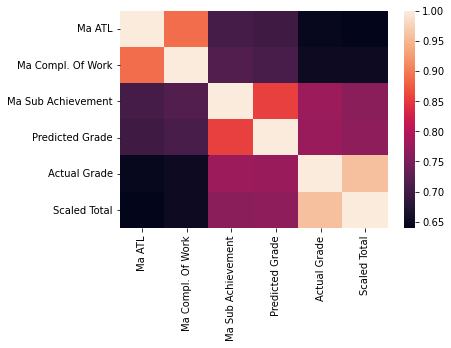

In [12]:
sns.heatmap(df.corr())

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650 entries, 0 to 177
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ma Std              650 non-null    object 
 1   Ma Teacher          650 non-null    object 
 2   Ma ATL              650 non-null    float64
 3   Ma Compl. Of Work   650 non-null    float64
 4   Ma Sub Achievement  650 non-null    float64
 5   Predicted Grade     650 non-null    float64
 6   Actual Grade        650 non-null    float64
 7   Scaled Total        650 non-null    float64
dtypes: float64(6), object(2)
memory usage: 45.7+ KB


In [14]:
# dummify Ma Std and Ma Teacher
col= ['Ma Std','Ma Teacher']

# Creaing dummies 
df= pd.get_dummies(columns=col, data=df)

In [15]:
df.head()

,Ma ATL,Ma Compl. Of Work,Ma Sub Achievement,Predicted Grade,Actual Grade,Scaled Total,Ma Std_ HL,Ma Std_ SL,Ma Std_HL,Ma Std_SL,Ma Teacher_ BGe,Ma Teacher_ CLe,Ma Teacher_ CNa,Ma Teacher_ FBe,Ma Teacher_ RCh,Ma Teacher_ SSn,Ma Teacher_BGe,Ma Teacher_CLe,Ma Teacher_CNa,Ma Teacher_DCh,Ma Teacher_FBe,Ma Teacher_FYi,Ma Teacher_GGo,Ma Teacher_GTu,Ma Teacher_Gtu,Ma Teacher_JTo,Ma Teacher_LLP,Ma Teacher_RCh,Ma Teacher_TSS
0,7.0,7.0,6.0,6.0,6.0,74.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,6.0,6.0,6.0,6.0,6.0,69.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,5.0,5.0,4.0,4.0,4.0,44.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,7.0,7.0,6.0,6.0,6.0,76.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5.0,5.0,4.0,5.0,5.0,57.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [16]:
# create train test split 
X = df.drop(['Predicted Grade','Actual Grade','Scaled Total'],axis=1)
y = df['Actual Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [17]:
X.columns

Index(['Ma ATL', 'Ma Compl. Of Work', 'Ma Sub Achievement', 'Ma Std_ HL',
       'Ma Std_ SL', 'Ma Std_HL', 'Ma Std_SL', 'Ma Teacher_ BGe',
       'Ma Teacher_ CLe', 'Ma Teacher_ CNa', 'Ma Teacher_ FBe',
       'Ma Teacher_ RCh', 'Ma Teacher_ SSn', 'Ma Teacher_BGe',
       'Ma Teacher_CLe', 'Ma Teacher_CNa', 'Ma Teacher_DCh', 'Ma Teacher_FBe',
       'Ma Teacher_FYi', 'Ma Teacher_GGo', 'Ma Teacher_GTu', 'Ma Teacher_Gtu',
       'Ma Teacher_JTo', 'Ma Teacher_LLP', 'Ma Teacher_RCh', 'Ma Teacher_TSS'],
      dtype='object')

In [18]:
# instantiate standard scaler
sc = StandardScaler()

# fit standard scaler on train set
X_train_sc = sc.fit_transform(X_train)

# transform test set 
X_test_sc = sc.transform(X_test)


In [19]:
# functions for comparing models 

# RMSE function
def rmse(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse.mean())

#compare train, test, and cv score
def display_r2(model, X_train, y_train, X_test, y_test):
    print('Train Score: ', round(model.score(X_train,y_train),7))
    print('Test Score: ', round(model.score(X_test, y_test),7))
    print('Cross Val Score:', round(cross_val_score(model, X_test,y_test).mean(),7))

# model comparisons
model_dictionary = {}
def add_model(name, model, X_test, y_test):
    model_dictionary[name] = [round(rmse(model,X_test,y_test),7), #RMSE
                              round(model.score(X_test, y_test),7)] #r2 score
    return pd.DataFrame.from_dict(model_dictionary, orient = 'index', columns=['RMSE', 'R2 Score'])
    
# Plot Residuals and Predictions
def plot_pred(model, X_test, y_test):
    pred = model.predict(X_test)
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))
    
    #Plot Residuals
    ax1.set_title('Residuals Plot')
    ax1.set(xlabel='Predicted values', ylabel='Residuals')
    ax1.scatter(pred, y_test - pred)
    ax1.hlines(y = 0, xmin = min(pred), xmax = max(pred), colors='red', linestyles='solid')
    
    #Plot Predictions
    ax2.set_title('Predictions vs Actuals')
    ax2.set(xlabel='Predicted values', ylabel='Actual Values')
    ax2.scatter(pred, y_test)
    
    lims = [
    np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
    np.max([ax2.get_xlim(), ax2.get_ylim()]),  # max of both axes
    ]
    
    ax2.plot(lims, lims, 'k-', c = 'red', zorder=0)
                              
    plt.show()

# Baseline

In [20]:
mean_yhat = y_train.mean()

In [21]:
# Create dataframe of actual and predicted sale price for test set
baseline = pd.DataFrame(y_test)
baseline['yhat'] = mean_yhat

In [22]:
# Calculate RMSE for test set
print('RMSE :',(np.mean(np.square(np.expm1(y_test) - np.expm1(mean_yhat)) ** 0.5)))

#Calculate r2 score
print('r2 score:', metrics.r2_score(baseline['Actual Grade'], baseline['yhat']))

RMSE : 261.04692888537073
r2 score: -0.0002563633484908845


In [23]:
model_dictionary = {'Baseline': [np.mean(np.square(y_test - mean_yhat)) ** 0.5, #RMSE
                                 metrics.r2_score(baseline['Actual Grade'], baseline['yhat'])]} #r2 Score

# Linear Regression

compare the RMSE, train test score as well as R2

In [24]:
# instantiate linear regression 
lm = LinearRegression()

# fit linear regression model on train data
lm.fit(X_train_sc,y_train)

LinearRegression()

In [25]:
# compare train, test, cv scores
display_r2(lm, X_train_sc, y_train, X_test_sc, y_test)

Train Score:  0.6871283
Test Score:  0.6242078
Cross Val Score: 0.5922114


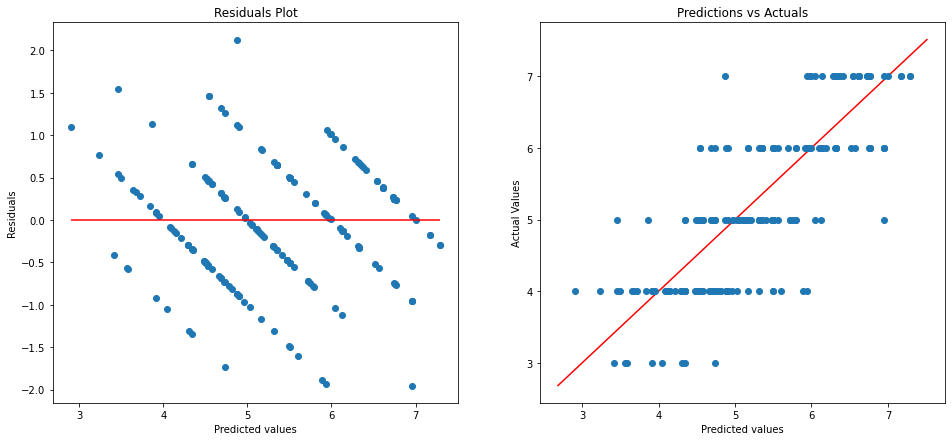

In [26]:
# plot residuals and prediction vs actual
plot_pred(lm, X_test_sc, y_test)

In [27]:
# add model for comparison
add_model('LinReg Default', lm, X_test_sc, y_test)

,RMSE,R2 Score
Baseline,1.144024,-0.000256
LinReg Default,0.718962,0.624208


# Ridge Regression with hyperparameter tuning

In [28]:
# choose values of alpha to train
r_alphas = np.logspace(0.01, 50, 700)

# instantiate ridgeCV
ridge_cv = RidgeCV(alphas=r_alphas, scoring='neg_root_mean_squared_error', cv=5)

# fit ridgeCV to train data
ridge_cv = ridge_cv.fit(X_train_sc, y_train)

In [29]:
# store best value for alpha
ridge_a = ridge_cv.alpha_

In [30]:
#instantiate ridge with best value for alpha
ridge_tuned = Ridge(alpha = ridge_a )

#fit ridge to train data
ridge_tuned.fit(X_train_sc, y_train)

Ridge(alpha=16.81820668060909)

In [31]:
# compare train, test, cv scores
display_r2(ridge_tuned, X_train_sc, y_train, X_test_sc, y_test)

Train Score:  0.6860768
Test Score:  0.62892
Cross Val Score: 0.5895141


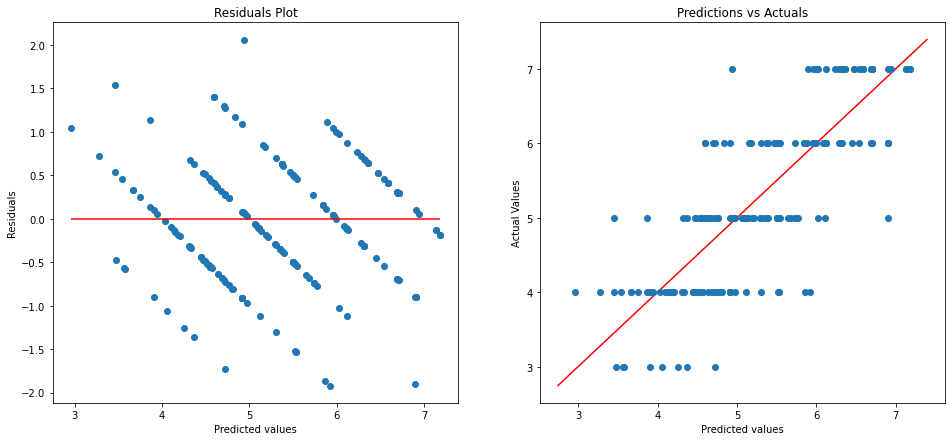

In [32]:
# plot residuals and prediction vs actual
plot_pred(ridge_tuned, X_test_sc, y_test)

In [33]:
# add model for comparison
add_model('Ridge with Hyperparameter Tuning', ridge_tuned, X_test_sc, y_test)

,RMSE,R2 Score
Baseline,1.144024,-0.000256
LinReg Default,0.718962,0.624208
Ridge with Hyperparameter Tuning,0.720323,0.628920


# Lasso Regression with hyperparameter tuning

In [34]:
# choose values of alpha to train
l_alphas = np.logspace(-3, 100, 500)

# instantiate lassoCV
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=80000)

# fit lassoCV to train data
lasso_cv.fit(X_train_sc, y_train);


In [35]:
# store best value for alpha
lasso_a = lasso_cv.alpha_

In [36]:
# instantiate lasso with new alpha
lasso_tuned = Lasso(alpha = lasso_a )

# fit lasso to train data
lasso_tuned.fit(X_train_sc, y_train)

Lasso(alpha=0.0066934697129586605)

In [37]:
# compare train, test, cv scores

display_r2(lasso_tuned, X_train_sc, y_train, X_test_sc, y_test)

Train Score:  0.6862489
Test Score:  0.622754
Cross Val Score: 0.5894203


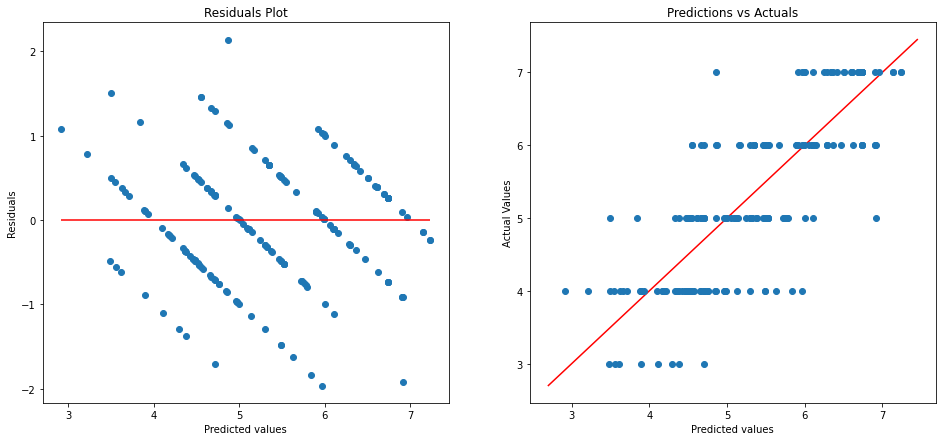

In [38]:
# plot residuals and prediction vs actual

plot_pred(lasso_tuned, X_test_sc, y_test)

In [39]:
# add model for comparison

add_model('Lasso with Hyperparameter Tuning', lasso_tuned, X_test_sc, y_test)

,RMSE,R2 Score
Baseline,1.144024,-0.000256
LinReg Default,0.718962,0.624208
Ridge with Hyperparameter Tuning,0.720323,0.628920
Lasso with Hyperparameter Tuning,0.721412,0.622754


In [40]:
# rounding the results off to nearest whole number

y_test_pred = lasso_tuned.predict(X_test_sc).round().astype('int')

In [41]:
X_test

,Ma ATL,Ma Compl. Of Work,Ma Sub Achievement,Ma Std_ HL,Ma Std_ SL,Ma Std_HL,Ma Std_SL,Ma Teacher_ BGe,Ma Teacher_ CLe,Ma Teacher_ CNa,Ma Teacher_ FBe,Ma Teacher_ RCh,Ma Teacher_ SSn,Ma Teacher_BGe,Ma Teacher_CLe,Ma Teacher_CNa,Ma Teacher_DCh,Ma Teacher_FBe,Ma Teacher_FYi,Ma Teacher_GGo,Ma Teacher_GTu,Ma Teacher_Gtu,Ma Teacher_JTo,Ma Teacher_LLP,Ma Teacher_RCh,Ma Teacher_TSS
165,7.0,7.0,7.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
60,6.0,6.0,4.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
112,6.0,6.0,5.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,6.0,5.0,4.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
76,7.0,7.0,7.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,7.0,7.0,5.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96,6.0,6.0,6.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
143,5.0,5.0,4.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
115,6.0,6.0,5.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
X_test['model prediction'] = y_test_pred

In [43]:
X_test.head()

,Ma ATL,Ma Compl. Of Work,Ma Sub Achievement,Ma Std_ HL,Ma Std_ SL,Ma Std_HL,Ma Std_SL,Ma Teacher_ BGe,Ma Teacher_ CLe,Ma Teacher_ CNa,Ma Teacher_ FBe,Ma Teacher_ RCh,Ma Teacher_ SSn,Ma Teacher_BGe,Ma Teacher_CLe,Ma Teacher_CNa,Ma Teacher_DCh,Ma Teacher_FBe,Ma Teacher_FYi,Ma Teacher_GGo,Ma Teacher_GTu,Ma Teacher_Gtu,Ma Teacher_JTo,Ma Teacher_LLP,Ma Teacher_RCh,Ma Teacher_TSS,model prediction
165,7.0,7.0,7.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7
60,6.0,6.0,4.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5
112,6.0,6.0,5.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5
5,6.0,5.0,4.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5
76,7.0,7.0,7.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
